In [13]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import mplcyberpunk
import plotly.offline as ply

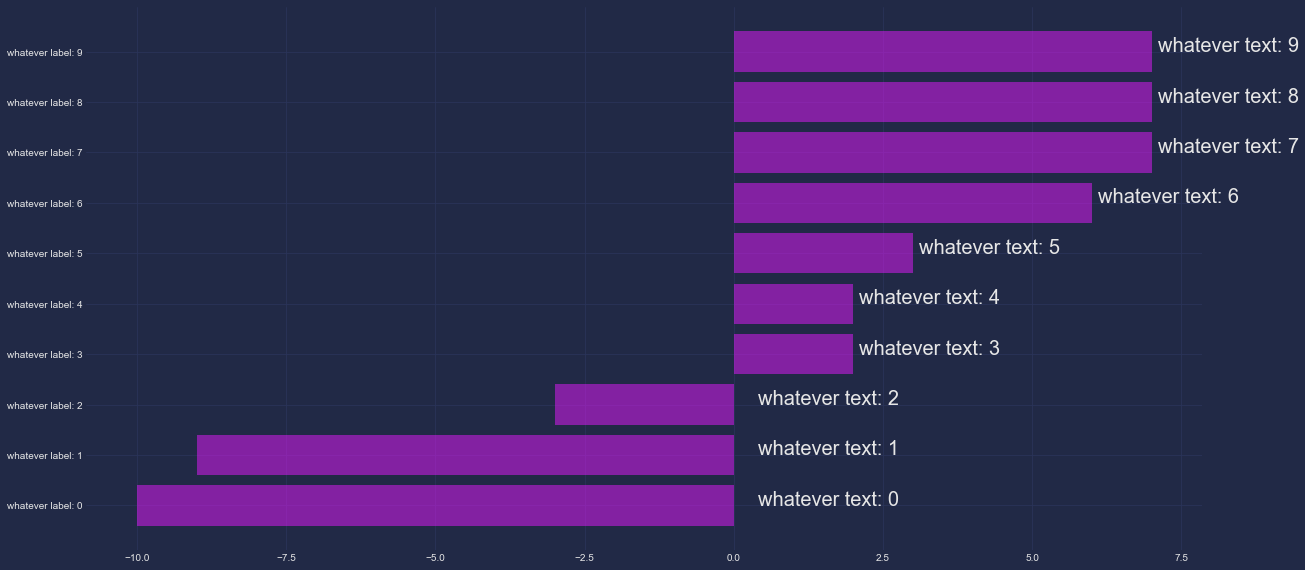

In [14]:
length = np.random.randint(-10, 10, 10)
length.sort()

yticks_labels = ['whatever label: {}'.format(i) for i in range(10)]
labels = ['whatever text: {}'.format(i) for i in range(10)]
figsize = (20, 10)

def plot_horizontal_bar_1(length, labels, yticks_labels, figsize):
    plt.style.use("cyberpunk")
    fig = plt.figure(figsize = (20,10))
    ax = fig.gca()
    mplcyberpunk.make_lines_glow(ax)
    for i in range(10):
        ax.barh(i, length[i], label = labels[i], color=(0.9, 0.1, 1), alpha = 0.5)
        if length[i] < 0:
            ax.annotate(labels[i], xy = (0,i), xytext = (0.4, i), fontsize = 20)
        else:
            ax.annotate(labels[i], xy = (0,i), xytext = (length[i] + 0.1, i),fontsize = 20)
    ax.set_yticks(np.arange(0,10))
    ax.set_yticklabels(yticks_labels, fontsize = 10)
    
plot_horizontal_bar_1(length, labels, yticks_labels, figsize)


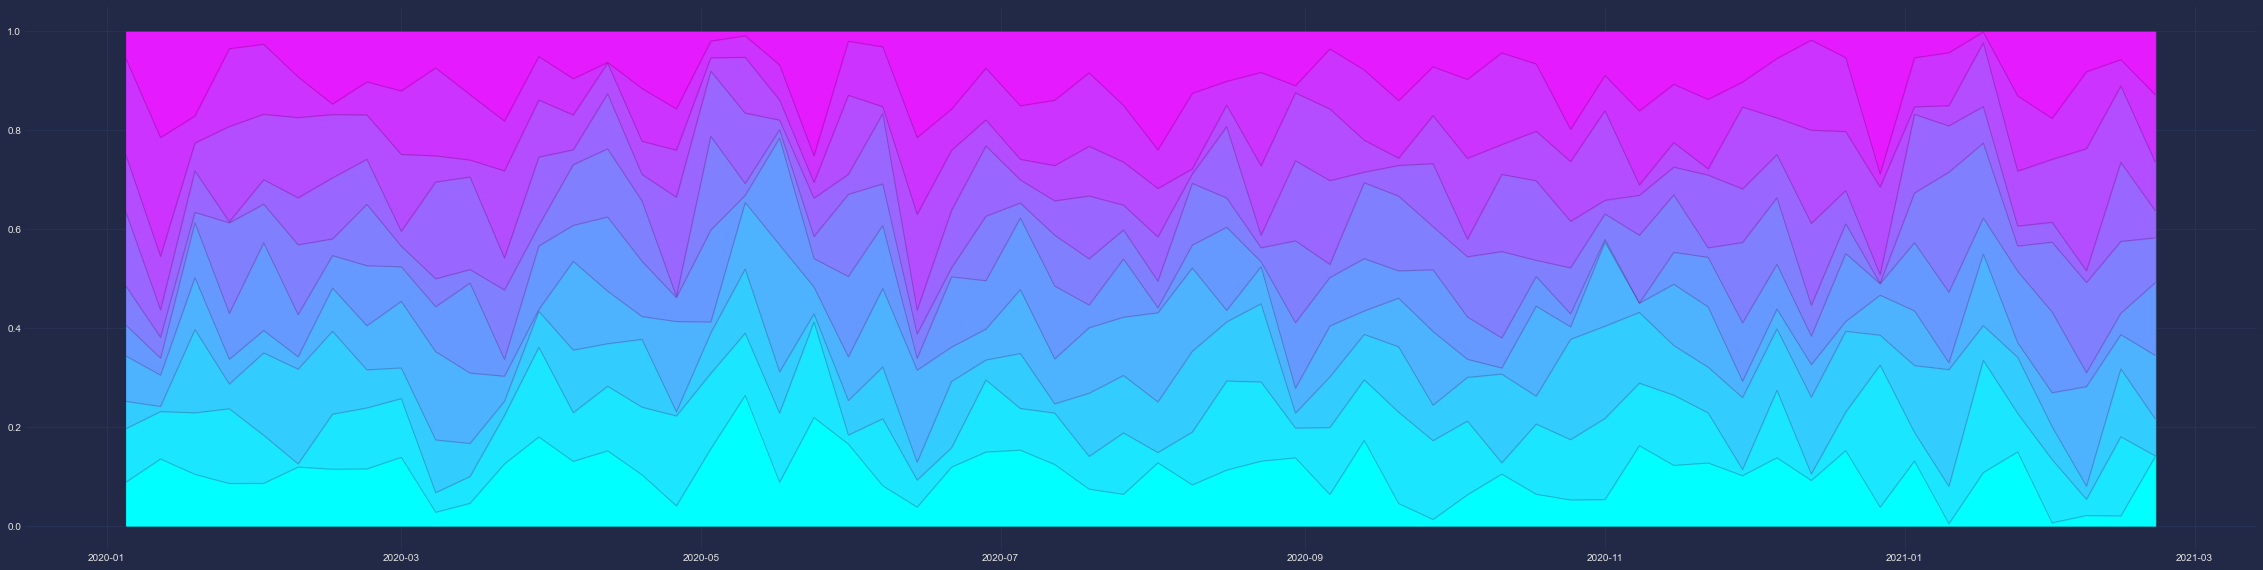

In [35]:
def plot_time_probabilities(probabilities_in_time, number_of_events): 
    plt.figure(figsize = (40,10))
    plt.style.use('cyberpunk')
    n = number_of_events
    for i in range(number_of_events):
        if i == 0:
            plt.plot(probabilities_in_time[i], color='black', alpha=0.2, linewidth = 1)
            plt.fill_between(probabilities_in_time.index, probabilities_in_time[i], color=(i/number_of_events, (number_of_events-i)/number_of_events, 1))
        if 0 < i:
            probabilities_in_time[i] += probabilities_in_time[i-1]
            plt.plot(probabilities_in_time[i], color='black', alpha=0.2, linewidth = 1)
            plt.fill_between(probabilities_in_time.index, probabilities_in_time[i-1], probabilities_in_time[i], color=(i/number_of_events, (number_of_events-i)/number_of_events, 1))

date = pd.date_range('2020-01-01', '2021-02-24', freq='W')
number_of_events = 10
probabilities_in_time = np.random.random((10, len(date)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = date
plot_time_probabilities(probabilities_in_time, number_of_events)

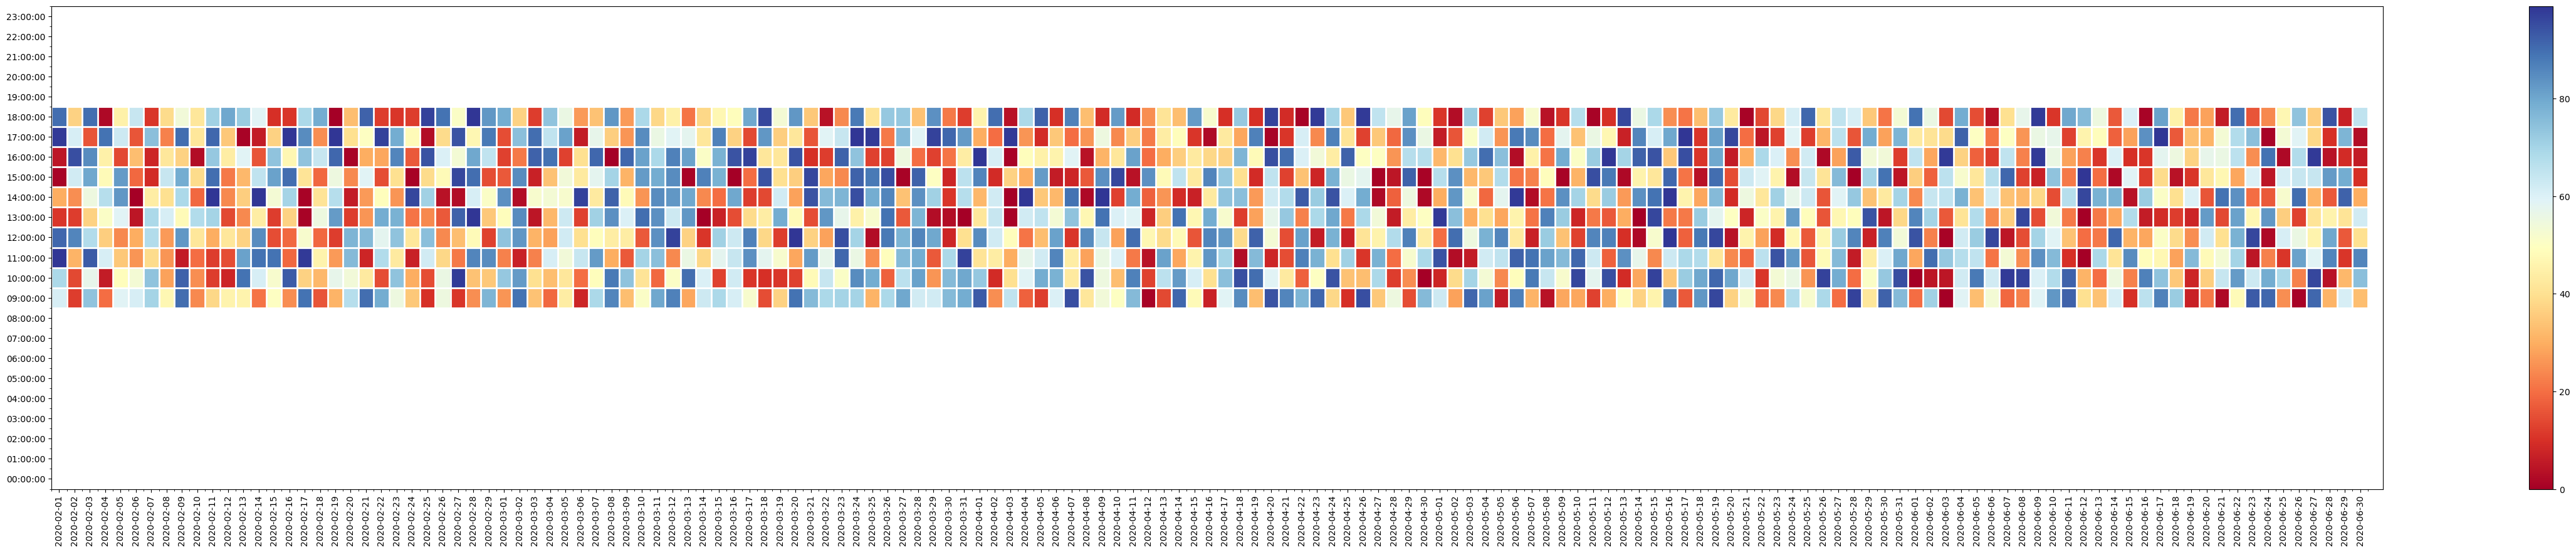

In [39]:
def plot_intraday_ts(intraday):
    fig = plt.figure(figsize = (60, 10))
    fig.patch.set_facecolor('white')
    plt.style.use('default')
    df = intraday.to_frame()
    df = pd.DataFrame({'Date': intraday.index.time, 
                   'Time': intraday.index.date, 
                   'Temperature': df[0]})
    newdf = df.pivot(index='Date', columns='Time', values='Temperature')
    plt.imshow(newdf, cmap='RdYlBu', aspect='auto', origin='lower')
    plt.colorbar()
    plt.grid(b=False)
    ax = plt.gca()
    ax.set_xticks(np.arange(len(newdf.columns)-1))
    ax.set_yticks(np.arange(len(newdf.index)))
    ax.set_xticklabels(newdf.columns, rotation = 'vertical')
    ax.set_yticklabels(newdf.index)
    ax.set_xticks(np.arange(-0.5,len(newdf.columns)-1), minor=True)
    ax.set_yticks(np.arange(-0.5,len(newdf.index)), minor=True)
    ax.grid(which='minor', color='white', linestyle='-', linewidth=2)
    plt.show()
    
intraday = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday.loc[(intraday.index.hour < 9) | (intraday.index.hour > 18)] = np.nan

plot_intraday_ts(intraday)